In [38]:
import pandas as pd

In [39]:
data=pd.read_csv("C:\\Users\\welcome\\company task\\company task\\musk_csv.csv")

In [40]:
data

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [41]:
data[data==0].count()

ID                      0
molecule_name           0
conformation_name       0
f1                      2
f2                      0
                     ... 
f163                    0
f164                    1
f165                    0
f166                   17
class                5581
Length: 170, dtype: int64

In [42]:
data.isna().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [43]:
data["class"].value_counts()

0    5581
1    1017
Name: class, dtype: int64

In [44]:
li=list(data[data["class"]==0].sample(n=4500).index)

In [45]:
data.drop(li,inplace=True)

In [46]:
data["class"].value_counts()

0    1081
1    1017
Name: class, dtype: int64

In [47]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [48]:
data.drop("ID",axis=1,inplace=True)

In [49]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

for i in data.columns:
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [50]:
import pandas as pd
x=data.drop("class",axis=1)
y=pd.get_dummies(data['class']).values

In [51]:
x

,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,...,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
0,0,133,46,-108,-60,-69,-117,49,38,-161,...,-244,-308,52,-7,39,126,156,-50,-112,96
1,0,134,41,-188,-145,22,-117,-6,57,-171,...,-235,-59,-2,52,103,136,169,-61,-136,79
2,0,135,46,-194,-145,28,-117,73,57,-168,...,-238,-134,-154,57,143,142,165,-67,-145,39
3,0,136,41,-188,-145,22,-117,-7,57,-170,...,-236,-60,-4,52,104,136,168,-60,-135,80
4,0,137,41,-188,-145,22,-117,-7,57,-170,...,-236,-60,-4,52,104,137,168,-60,-135,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6580,89,2093,37,-68,15,34,-117,-100,91,12,...,-228,-227,-203,-4,28,113,195,-55,-149,113
6581,89,2094,48,-153,15,30,-117,-87,91,18,...,-233,-241,-207,17,155,132,187,-72,-172,14
6588,89,2095,37,-134,-28,33,-117,-97,208,3,...,-231,-242,-205,-10,22,111,195,-55,-150,113
6593,89,2096,51,-123,-23,-108,-117,134,-160,82,...,62,-66,164,-14,-29,107,171,-44,-115,118


In [52]:
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,random_state=1)

In [55]:
train_x.shape

(1678, 168)

In [56]:
train_y.shape

(1678, 2)

In [57]:
import tensorflow as tf

In [58]:
graph=tf.Graph()

In [106]:
with graph.as_default():
     
    x_input  = tf.compat.v1.placeholder(tf.float32, shape=[None, 168])
    y_output = tf.compat.v1.placeholder(tf.float32, shape=[None, 2])
    
    weights1 = tf.Variable(tf.compat.v1.random_normal([168,70],
                                           mean=0,
                                           stddev=0.01,
                                           name="weights1"))

    bias1 = tf.Variable(tf.compat.v1.random_normal([1,70],
                                        mean=0,
                                        stddev=0.01,
                                        name="bias1"))
    weights2 = tf.Variable(tf.compat.v1.random_normal([70,30],
                                           mean=0,
                                           stddev=0.01,
                                           name="weights2"))

    bias2 = tf.Variable(tf.compat.v1.random_normal([1,30],
                                        mean=0,
                                        stddev=0.01,
                                        name="bias2"))
    weights3 = tf.Variable(tf.compat.v1.random_normal([30,2],
                                           mean=0,
                                           stddev=0.01,
                                           name="weights3"))

    bias3 = tf.Variable(tf.compat.v1.random_normal([1,2],
                                        mean=0,
                                        stddev=0.01,
                                        name="bias3"))
    
 
  
    apply_weights_OP1 = tf.matmul(x_input, weights1, name="apply_weights1")
    add_bias_OP1 = tf.add(apply_weights_OP1, bias1, name="add_bias1") 
    activation_OP1 = tf.nn.sigmoid(add_bias_OP1, name="activation1")
    
    apply_weights_OP2 = tf.matmul(activation_OP1, weights2, name="apply_weights2")
    add_bias_OP2 = tf.add(apply_weights_OP2, bias2, name="add_bias2") 
    activation_OP2 = tf.nn.sigmoid(add_bias_OP2, name="activation2")
    
    
    #output  layer
    add_bias_OP3=tf.matmul(activation_OP2, weights3) + bias3
    activation_OP5 = tf.nn.softmax(add_bias_OP3)
    #cross entropy  it is a classification model 
    #entropy=-plogp-qlogq
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_output*tf.compat.v1.log(activation_OP5),axis=1))
    
    train_step=tf.compat.v1.train.AdamOptimizer(0.01).minimize(cross_entropy)
    correct_pred=tf.equal(tf.argmax(activation_OP5,1),tf.argmax(y_output,1))
    accuracy=tf.reduce_mean(tf.cast(correct_pred,float))
    init=tf.compat.v1.global_variables_initializer()
    
    
    

In [107]:
sess = tf.compat.v1.Session(graph=graph)
sess.run(init)

In [108]:
numEpochs = 10000
cost = 0
diff = 1
epoch_values = []
accuracy_values = []
cost_values = []


# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(train_step, feed_dict={x_input:train_x, y_output: train_y})
        # Report occasional stats
        if i % 1 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            train_accuracy, newCost = sess.run([accuracy, cross_entropy], feed_dict={x_input:train_x, y_output: train_y})
            # Add accuracy to live graphing variable
            accuracy_values.append(train_accuracy)
            cost_values.append(newCost)
#             #error for test 
#             test_accuracy, newCost2 = sess.run([accuracy, cross_entropy], feed_dict={x_input:test_x, y_output: test_y})
#             test_acc_val.append(test_accuracy)
#             test_cost.append(newCost2)

            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, training accuracy %g, cost %g, change in cost %g"%(i, train_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={x_input:train_x, y_output: train_y})))

step 0, training accuracy 0.513707, cost 0.701821, change in cost 0.701821
step 1, training accuracy 0.513707, cost 0.691974, change in cost 0.00984687
step 2, training accuracy 0.486293, cost 0.692198, change in cost 0.000223577
step 3, training accuracy 0.486293, cost 0.692685, change in cost 0.000487387
step 4, training accuracy 0.486293, cost 0.688906, change in cost 0.00377947
step 5, training accuracy 0.706198, cost 0.6825, change in cost 0.00640607
step 6, training accuracy 0.670441, cost 0.67507, change in cost 0.00742936
step 7, training accuracy 0.672825, cost 0.665712, change in cost 0.00935882
step 8, training accuracy 0.672229, cost 0.654118, change in cost 0.0115931
step 9, training accuracy 0.670441, cost 0.639309, change in cost 0.0148091
step 10, training accuracy 0.672825, cost 0.618922, change in cost 0.0203876
step 11, training accuracy 0.716925, cost 0.598506, change in cost 0.0204155
step 12, training accuracy 0.744934, cost 0.579344, change in cost 0.0191622
step

In [109]:
import numpy as np
epoch_vl=np.array(epoch_values)
accuracy_values=np.array(accuracy_values)


Text(0, 0.5, 'accuracy_values')

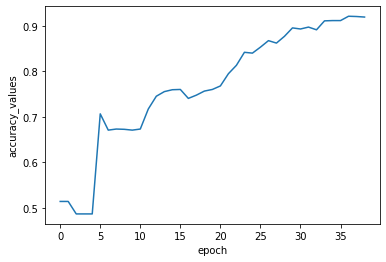

In [110]:
plt.plot(epoch_vl,accuracy_values)
plt.xlabel("epoch")
plt.ylabel("accuracy_values")

In [81]:
import matplotlib.pyplot as plt

In [112]:
numEpochs = 10000
cost = 0
diff = 1
epoch_values = []

test_acc_val=[]
test_cost=[]

# Training epochs
for i in range(numEpochs):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(train_step, feed_dict={x_input:test_x, y_output: test_y})
        # Report occasional stats
        if i % 10 == 0:
            # Add epoch to epoch_values
            epoch_values.append(i)
            # Generate accuracy stats on test data
            test_accuracy, newCost = sess.run([accuracy, cross_entropy], feed_dict={x_input:test_x, y_output: test_y})
            # Add accuracy to live graphing variable
            test_acc_val.append(test_accuracy)
            test_cost.append(newCost)
#             #error for test 
#             test_accuracy, newCost2 = sess.run([accuracy, cross_entropy], feed_dict={x_input:test_x, y_output: test_y})
#             test_acc_val.append(test_accuracy)
#             test_cost.append(newCost2)
            # Re-assign values for variables
            diff = abs(newCost - cost)
            cost = newCost

            #generate print statements
            print("step %d, testing accuracy %g, cost %g, change in cost %g"%(i, test_accuracy, newCost, diff))


# How well do we perform on held-out test data?
print("final accuracy on test set: %s" %str(sess.run(accuracy, 
                                                     feed_dict={x_input:test_x, y_output: test_y})))

step 0, testing accuracy 0.888095, cost 0.229095, change in cost 0.229095
step 10, testing accuracy 0.909524, cost 0.209342, change in cost 0.0197527
step 20, testing accuracy 0.921429, cost 0.234399, change in cost 0.0250567
step 30, testing accuracy 0.909524, cost 0.230584, change in cost 0.00381505
step 40, testing accuracy 0.895238, cost 0.268084, change in cost 0.037501
step 50, testing accuracy 0.919048, cost 0.208896, change in cost 0.0591887
step 60, testing accuracy 0.857143, cost 0.296097, change in cost 0.0872016
step 70, testing accuracy 0.878571, cost 0.260467, change in cost 0.0356301
step 80, testing accuracy 0.845238, cost 0.264116, change in cost 0.00364876
step 90, testing accuracy 0.895238, cost 0.23627, change in cost 0.0278461
step 100, testing accuracy 0.897619, cost 0.222825, change in cost 0.0134449
step 110, testing accuracy 0.864286, cost 0.245187, change in cost 0.0223619
step 120, testing accuracy 0.92381, cost 0.207974, change in cost 0.0372129
step 130, te

Text(0, 0.5, 'test accuracy')

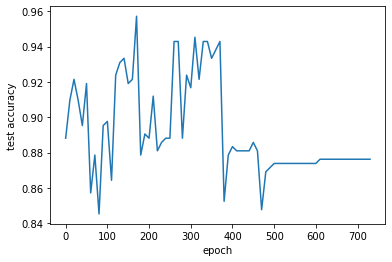

In [113]:
#  accuracy of testing 
plt.plot(epoch_values,test_acc_val)
plt.xlabel("epoch")
plt.ylabel("test accuracy")

Text(0, 0.5, 'test cost')

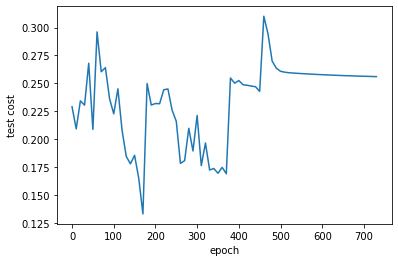

In [114]:
#cost error
plt.plot(epoch_values,test_cost)
plt.xlabel("epoch")
plt.ylabel("test cost")

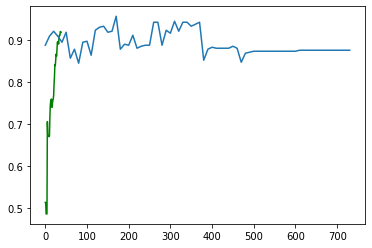

In [115]:
plt.plot(epoch_vl,accuracy_values,"g")
plt.plot(epoch_values,test_acc_val)